# Correction TP Introduction -- François Portier

In [1]:
import math                         # import a package\n",
import numpy as np                  # import a package with specified name\n",
from sklearn import linear_model    # import whole module\n",
from os import mkdir, rmdir, path   # import a function\n",
from inspect import getsourcelines  # get function source code\n",
import random
import string
import time
import pandas as pd
import urllib
import zipfile
import matplotlib.pyplot as plt     # for plots\n",
import seaborn as sns               # for plots\n",
import sys

# 1) Introduction: Python, Numpy et Scipy

In [2]:
# Two possible solutions, non-exhaustive (but check at least on different values that they give the same results)\n",
def nextpower(n):
    "    \"\"\"Compute the next power of 2 of n.\"\"\"\n",
    return int(2 ** (math.ceil(math.log(n, 2))))
   
def nextpowerbis(n):
    "    \"\"\"Compute the next power of 2 of n.\"\"\"\n",
    sol = 1
    while sol < n:
        sol *= 2
    return sol


In [3]:
alphabet = string.ascii_lowercase
print(alphabet[2:25:3])
print(alphabet[21:26:2])
print(alphabet[-5::2])
print(alphabet[-1:-6:-2])

cfilorux
vxz
vxz
zxv


In [4]:
matrice = np.random.uniform(-1, 1, (5, 6))
print(matrice)
    
# second solution: column manipulation
m_sol1 = matrice.copy()
m_sol1[:, 0] = matrice[:, 0] - 2 * matrice[:, 1]
m_sol1[:, 2] = matrice[:, 2] - 2 * matrice[:, 3]
m_sol1[:, 4] = matrice[:, 4] - 2 * matrice[:, 5]
# zeroing negative values
m_sol1[m_sol1 <= 0] = 0
print(m_sol1)


[[-0.89437489  0.97209825 -0.06063026  0.06296435  0.21908263  0.42322086]
 [-0.32181465 -0.35617323 -0.11963772 -0.45738145  0.32631854 -0.40316707]
 [ 0.32399077 -0.6305343   0.40009859 -0.00560546 -0.98572244  0.13442733]
 [ 0.08913262 -0.57086275 -0.60210443  0.42738704  0.90796689 -0.55083303]
 [-0.36212179 -0.87496662  0.69952056  0.20750344  0.69492978 -0.84581911]]
[[0.         0.97209825 0.         0.06296435 0.         0.42322086]
 [0.39053181 0.         0.79512518 0.         1.13265269 0.        ]
 [1.58505937 0.         0.4113095  0.         0.         0.13442733]
 [1.23085812 0.         0.         0.42738704 2.00963295 0.        ]
 [1.38781146 0.         0.28451368 0.20750344 2.386568   0.        ]]


In [5]:
# second solution: matrix multiplication
m_int = np.eye(6, 6)
m_int[1, 0] = -2
m_int[3, 2] = -2
m_int[5, 4] = -2
print(m_int)
m_sol2 = matrice.dot(m_int)

# zeroing negative values
m_sol2[m_sol2 <= 0] = 0
print(m_sol2)
np.allclose(m_sol1, m_sol2)

[[ 1.  0.  0.  0.  0.  0.]
 [-2.  1.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.]
 [ 0.  0. -2.  1.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0. -2.  1.]]
[[0.         0.97209825 0.         0.06296435 0.         0.42322086]
 [0.39053181 0.         0.79512518 0.         1.13265269 0.        ]
 [1.58505937 0.         0.4113095  0.         0.         0.13442733]
 [1.23085812 0.         0.         0.42738704 2.00963295 0.        ]
 [1.38781146 0.         0.28451368 0.20750344 2.386568   0.        ]]


True

In [6]:
matrice = np.random.uniform(-1, 1, (5, 20))
G = matrice.T.dot(matrice)
print(np.allclose(G, G.T))
# Bad solution: Remark that eig could give weird complex values...
# this not satisfactory if the matrix G is known to be symmetric
eig_val_bad, _ = np.linalg.eig(G)
print(eig_val_bad)

# solution 1: Remark that eig could give weird complex values...
# this not satisfactory if the matrix G is known to be symmetric
eig_val, _ = np.linalg.eigh(G)

# solution 2: no need of eigenvectors
eig_val = np.linalg.eigvalsh(G)

idx = eig_val.argsort()[::-1]
print(eig_val[idx])

True
[ 1.11058576e+01+0.00000000e+00j  7.43931577e+00+0.00000000e+00j
  2.93311354e+00+0.00000000e+00j  3.62938644e+00+0.00000000e+00j
  5.62613655e+00+0.00000000e+00j  8.71506614e-16+0.00000000e+00j
  5.31326712e-16+8.52723863e-17j  5.31326712e-16-8.52723863e-17j
 -5.86137306e-16+0.00000000e+00j -5.65849362e-16+0.00000000e+00j
 -4.38218788e-16+7.61837000e-17j -4.38218788e-16-7.61837000e-17j
 -2.48454771e-16+0.00000000e+00j -5.86543092e-17+1.50340607e-16j
 -5.86543092e-17-1.50340607e-16j  2.49848047e-16+1.18186846e-16j
  2.49848047e-16-1.18186846e-16j  9.72968154e-18+0.00000000e+00j
  1.02808267e-16+0.00000000e+00j  2.03216542e-16+0.00000000e+00j]
[ 1.11058576e+01  7.43931577e+00  5.62613655e+00  3.62938644e+00
  2.93311354e+00  1.31345767e-15  9.18394760e-16  3.67375038e-16
  2.08862913e-16  1.00680351e-16  6.02018232e-17 -2.07492828e-18
 -5.62647452e-17 -1.68815634e-16 -2.45001679e-16 -4.13411484e-16
 -5.08341623e-16 -9.03133742e-16 -1.02009426e-15 -1.25267670e-15]


In [7]:
# Beware some are numerically 0, but negative!
# Hence we only store the one being non numercially zero (at relative precision 1e-12)
nnz_eig = np.logical_not(np.isclose(eig_val, np.zeros(eig_val.shape), rtol=1e-12,))

# positivity of non-zero eigenvalues:
eig_nnz_val = eig_val[nnz_eig]
print("The non-zero eigenvalues are:" +  str(eig_nnz_val))
print('Are all eigenvalues positive? That is ' + str(np.all(eig_nnz_val > 0)))

The non-zero eigenvalues are:[ 2.93311354  3.62938644  5.62613655  7.43931577 11.10585764]
Are all eigenvalues positive? That is True


# 2) GALTON

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from statsmodels.nonparametric.kde import KDEUnivariate
from scipy.stats import gaussian_kde
import statsmodels.api as sm

from sklearn import linear_model
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from numpy.linalg import svd

from IPython.display import HTML
from IPython.display import display

%matplotlib inline
# REM: LaTeX needs to be install on the machine for some
#      display to be fined

In [34]:
# Load data
url = 'http://josephsalmon.eu/enseignement/TELECOM/MDI720/datasets/Galton.txt'
df = pd.read_csv(url, sep='\t')

# Convert inches to cm
df[['Father', 'Mother', 'Height']] = 2.54 * df[['Father', 'Mother', 'Height']]
pd.set_option('precision', 0)
df.head()
# Alternative:
# df.round({'Father': 0, 'Mother': 0, 'Height': 0})

# BEWARE: the display option does not necessarily affect the underlying float
# values so, depending on the choice performed, there might be a (tiny)
# difference in the estimators obtained latter on...

,Family,Father,Mother,Gender,Height,Kids
0,1,199,170,M,186,4
1,1,199,170,F,176,4
2,1,199,170,F,175,4
3,1,199,170,F,175,4
4,2,192,169,M,187,4


In [35]:
null_data = df[df.isnull().any(axis=1)]
print("There are " + str(df.isnull().sum().sum()) + ' total missing values.')

There are 0 total missing values.


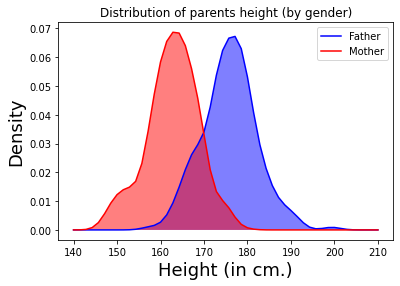

In [36]:
plt.figure()
kde_father = KDEUnivariate(df['Father'])
kde_father.fit(bw=2, kernel='gau')
x_grid = np.linspace(140, 210)
pdf_est_father = kde_father.evaluate(x_grid)

kde_mother = KDEUnivariate(df['Mother'])
kde_mother.fit(bw=2, kernel='gau')
x_grid = np.linspace(140, 210)
pdf_est_mother = kde_mother.evaluate(x_grid)

plt.plot(x_grid, pdf_est_father, color='b', label='Father')
plt.fill_between(x_grid, 0, pdf_est_father, facecolor='b', alpha=0.5)

plt.plot(x_grid, pdf_est_mother, color='r', label='Mother')
plt.fill_between(x_grid, 0, pdf_est_mother, facecolor='r', alpha=0.5)

plt.ylabel('Density', fontsize=18)
plt.xlabel('Height (in cm.)', fontsize=18)
plt.title("Distribution of parents height (by gender)")
plt.legend()
plt.show()

Family
1      199
10     188
100    175
101    175
102    175
      ... 
95     178
96     178
97     175
98     175
99     175
Name: Father, Length: 197, dtype: float64


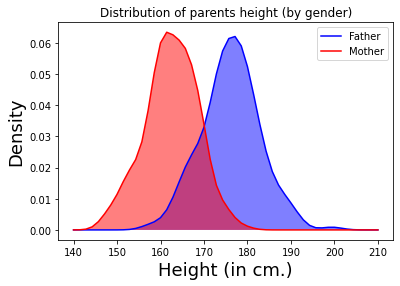

In [38]:
# Another possibility when the data has unique observations,\n",
# with gaussian_kde from scipy.stats\n",

father_unique = df['Father'].groupby(df['Family']).first()
mother_unique = df['Mother'].groupby(df['Family']).first()
print(father_unique)
plt.figure()
kde_father = gaussian_kde(father_unique)
x_grid = np.linspace(140, 210)
pdf_est_father = kde_father(x_grid)

kde_mother = gaussian_kde(mother_unique)
x_grid = np.linspace(140, 210)
pdf_est_mother = kde_mother(x_grid)

plt.plot(x_grid, pdf_est_father, color='b', label='Father')
plt.fill_between(x_grid, 0, pdf_est_father, facecolor='b', alpha=0.5)

plt.plot(x_grid, pdf_est_mother, color='r', label='Mother')
plt.fill_between(x_grid, 0, pdf_est_mother, facecolor='r', alpha=0.5)

plt.ylabel('Density', fontsize=18)
plt.xlabel('Height (in cm.)', fontsize=18)
plt.title("Distribution of parents height (by gender)")
plt.legend()
plt.show()

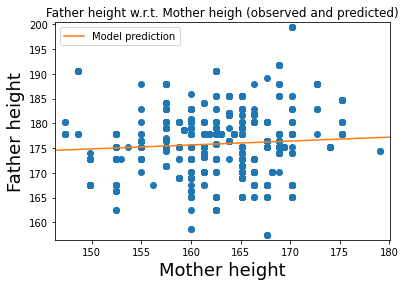

0.005426474934620118


In [13]:
plt.figure()
y = df['Father']
X = df[['Mother']]
plt.plot(X, y, 'o',label="")
plt.ylabel('Father height', fontsize=18)
plt.ylim([df['Father'].min()-1, df['Father'].max()+1])
plt.xlim([df['Mother'].min()-1, df['Mother'].max()+1])
plt.xlabel('Mother height', fontsize=18)
skl_lm = linear_model.LinearRegression(fit_intercept=True)
skl_lm.fit(X, y)
plt.plot(x_grid, skl_lm.predict(x_grid.reshape(x_grid.shape[0], 1)), '-', label='Model prediction')
plt.legend()
plt.title("Father height w.r.t. Mother heigh (observed and predicted)")
plt.show()

print(skl_lm.score(X, y))  # it is pretty small...

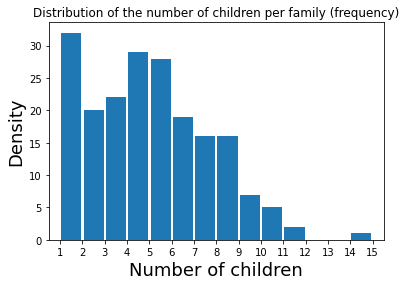

In [14]:
# second solution : normed=True
groupby_family = df['Family'].groupby(df['Family']).count()
plt.figure()
plt.hist(groupby_family, bins=14, rwidth=0.9)
plt.xlim([0.5, 15.5])
plt.xticks(np.arange(1,16))
plt.xlabel('Number of children', fontsize=18)
plt.ylabel('Density', fontsize=18)
plt.title("Distribution of the number of children per family (frequency)")
plt.show()

There are 197 families


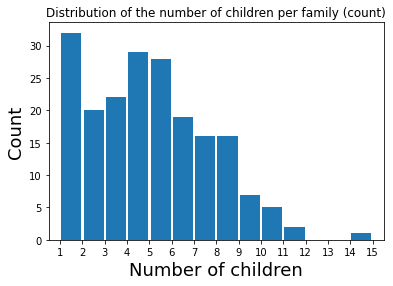

In [15]:
# second solution : normed=False
print("There are {} families".format(len(df['Family'].unique())))
groupby_family = df['Family'].groupby(df['Family']).count()
plt.figure()
plt.hist(groupby_family, bins=14, rwidth=0.9)
plt.xlim([0.5, 15.5])
plt.xticks(np.arange(1,16))
plt.xlabel('Number of children', fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.title("Distribution of the number of children per family (count)")
plt.show()

In [16]:
df['MidParents'] = 0.5 * (df['Father'] + 1.08 * df['Mother'])

In [17]:
Ratio = np.mean(df['Father']) / np.mean(df['Mother'])
print(Ratio)

1.0803384317037383


In [18]:
X0 = df[['MidParents']]
y = df['Height']
skl_lm = linear_model.LinearRegression()
skl_lm.fit(X0, y)
theta0 = skl_lm.intercept_
theta1 = skl_lm.coef_[0]
y_mean = y.mean()
X0_mean = (X0.mean(axis=0)).squeeze()
X0_var = X0.var(ddof=0).squeeze()
y_var = y.var(ddof=0)
theta1_manual = ((X0.squeeze() - X0_mean) * (y - y_mean)).mean() / X0_var
theta0_manual = y_mean - theta1_manual * X0_mean
print(theta1)
print(theta1_manual)

print('Are the two computations of theta1' + ' the same? This is {} and theta1={}'.format(np.isclose(theta1, theta1_manual),theta1))

print('Are the two computations of theta0' + ' the same? This is {}, and theta0={}'.format(np.isclose(theta0, theta0_manual),theta0))

0.6411903795908169
0.6411903795908144
Are the two computations of theta1 the same? This is True and theta1=0.6411903795908169
Are the two computations of theta0 the same? This is True, and theta0=56.83556243483079


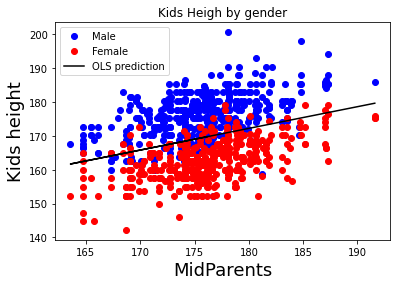

In [19]:
male = df['Gender'] == 'M'
female = df['Gender'] == 'F'
fig = plt.figure()
plt.plot(df['MidParents'][male], y[male], 'o', c='b', label="Male")
plt.plot(df['MidParents'][female], y[female], 'o', c='r', label="Female")
plt.plot(X0, skl_lm.predict(X0), label='OLS prediction', c='k')
plt.xlabel('MidParents', fontsize=18)
plt.ylabel('Kids height', fontsize=18)
plt.title("Kids Heigh by gender")
plt.legend()
plt.show()

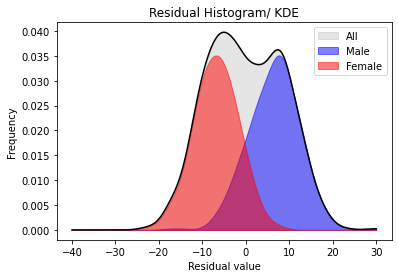

In [20]:
nb_f = float(female.sum())
nb_m = float(male.sum())
alpha_f = nb_f / (nb_f + nb_m)
alpha_m = nb_m / (nb_f + nb_m)

plt.figure()
residual = y - skl_lm.predict(X0)
x_grid = np.linspace(-40, 30, num=300)
plt.title('Residual Histogram/ KDE')
plt.xlabel('Residual value')
plt.ylabel('Frequency')

kde_residual = KDEUnivariate(residual)
kde_residual.fit(bw=2, kernel='gau')
pdf_est_residual = kde_residual.evaluate(x_grid)
plt.plot(x_grid, pdf_est_residual, color='k')
plt.fill_between(x_grid, pdf_est_residual, alpha=0.1, color='k', label='All')


kde_residual_m = KDEUnivariate(residual[male])
kde_residual_m.fit(bw=2, kernel='gau')
pdf_est_residual_m = kde_residual_m.evaluate(x_grid)
plt.fill_between(x_grid, alpha_m * pdf_est_residual_m, color='b', alpha=0.5,label='Male')


kde_residual_f = KDEUnivariate(residual[female])
kde_residual_f.fit(bw=2, kernel='gau')
pdf_est_residual_f = kde_residual_f.evaluate(x_grid)
plt.fill_between(x_grid, alpha_f * pdf_est_residual_f, color='r', alpha=0.5,label='Female')


plt.legend()
plt.show()

In [21]:
skl_lm = linear_model.LinearRegression()
skl_lm.fit(df[['Height']], df['MidParents'])
alpha0 = skl_lm.intercept_
alpha1 = skl_lm.coef_[0]
alpha0_manual = X0_mean + y_mean / X0_mean * X0_var / y_var * (theta0 - y_mean)
alpha1_manual = X0_var / y_var * theta1_manual
print(alpha1)
print(alpha1_manual)

print('Are the two computations of alpha1' +
     ' the same? This is {}'.format(np.isclose(alpha1, alpha1_manual)))

print('Are the two computations of alpha0' +
      ' the same? This is {}'.format(np.isclose(alpha0, alpha0_manual)))

0.1650383102126155
0.16503831021261522
Are the two computations of alpha1 the same? This is True
Are the two computations of alpha0 the same? This is True


# 2)  Introduction: Pandas, Matplotlib, etc.

In [22]:
# rank computation:
rk = str(np.sum(nnz_eig))
print('The rank is : ' + rk)
print('The rank is also: ' + str(np.linalg.matrix_rank(G)))

The rank is : 5
The rank is also: 5


In [23]:
# Detect and count lines with missing values.
na_values = ['?', '']
fields = ['Date', 'Time', 'Global_active_power', 'Sub_metering_1']
# Whole columns names:
# Date;Time;Global_active_power;Global_reactive_power;Voltage;Global_intensity;Sub_metering_1;Sub_metering_2;Sub_metering_3\n",
filename = "household_power_consumption"
df = pd.read_csv(filename + '.txt', sep=';', nrows=200000,
                 na_values=na_values, usecols=fields)

print("Are all values correct number? " + str(np.all(pd.notnull(df['Global_active_power']))))

# check example mentioned on the webpage describing the dataset
print(df.iloc[190500])

null_data = df[df.isnull().any(axis=1)]

print("There are " + str(df.isnull().sum().sum()) + ' total missing values')
print("There are " + str(null_data.shape[0]) + ' lines with missing values')

Are all values correct number? False
Date                   28/4/2007
Time                    00:24:00
Global_active_power          NaN
Sub_metering_1               NaN
Name: 190500, dtype: object
There are 7464 total missing values
There are 3732 lines with missing values


In [24]:
# Removing the NaN:
df = df.dropna(axis=0)
# new size:
print('The size without the NaNs is now ' + str(df.shape[0]))
df.head()

The size without the NaNs is now 196268


,Date,Time,Global_active_power,Sub_metering_1
0,16/12/2006,17:24:00,4,
1,16/12/2006,17:25:00,5,
2,16/12/2006,17:26:00,5,
3,16/12/2006,17:27:00,5,
4,16/12/2006,17:28:00,4,


In [25]:
df['Sub_metering_1'] = df['Sub_metering_1'] * 60. / 1000.
df.head(10)

,Date,Time,Global_active_power,Sub_metering_1
0,16/12/2006,17:24:00,4,
1,16/12/2006,17:25:00,5,
2,16/12/2006,17:26:00,5,
3,16/12/2006,17:27:00,5,
4,16/12/2006,17:28:00,4,
5,16/12/2006,17:29:00,4,
6,16/12/2006,17:30:00,4,
7,16/12/2006,17:31:00,4,
8,16/12/2006,17:32:00,4,
9,16/12/2006,17:33:00,4,


In [26]:
date =  pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True)
df.set_index(date, inplace=True)
df.head()

,Date,Time,Global_active_power,Sub_metering_1
2006-12-16 17:24:00,16/12/2006,17:24:00,4,
2006-12-16 17:25:00,16/12/2006,17:25:00,5,
2006-12-16 17:26:00,16/12/2006,17:26:00,5,
2006-12-16 17:27:00,16/12/2006,17:27:00,5,
2006-12-16 17:28:00,16/12/2006,17:28:00,4,


In [27]:
#'date' and 'time' are now remove
del df['Date']
del df['Time']
print(df)

                     Global_active_power  Sub_metering_1
2006-12-16 17:24:00                4e+00                
2006-12-16 17:25:00                5e+00                
2006-12-16 17:26:00                5e+00                
2006-12-16 17:27:00                5e+00                
2006-12-16 17:28:00                4e+00                
...                                  ...             ...
2007-05-04 14:39:00                3e-01                
2007-05-04 14:40:00                3e-01                
2007-05-04 14:41:00                3e-01                
2007-05-04 14:42:00                3e-01                
2007-05-04 14:43:00                4e-01                

[196268 rows x 2 columns]


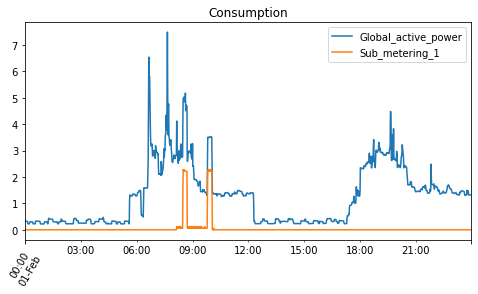

In [28]:
# check one single day day:
day_target = '02/01/2007'
df[day_target:day_target].plot(figsize=(8, 4))
plt.xticks(rotation=60)
plt.title("Consumption")
plt.legend()
plt.show()

In [29]:
ts = df.resample("D").mean()

day_ini = '01/01/2007'
day_end = '04/30/2007'
small_ts = ts[day_ini:day_end]
print(small_ts)
np.sum(pd.Series(small_ts['Global_active_power']).values)

            Global_active_power  Sub_metering_1
2007-01-01                2e+00           0e+00
2007-01-02                9e-01           0e+00
2007-01-03                7e-01           0e+00
2007-01-04                2e+00           4e-02
2007-01-05                2e+00           6e-02
...                         ...             ...
2007-04-26                9e-01           6e-02
2007-04-27                8e-01           7e-02
2007-04-28                1e+00           0e+00
2007-04-29                  NaN             NaN
2007-04-30                7e-01           1e-01

[120 rows x 2 columns]


nan

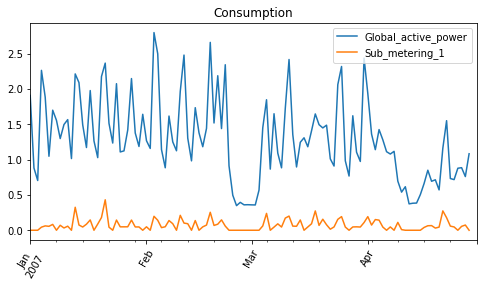

In [30]:
# grouping by day:
small_ts.plot(figsize=(8, 4))
plt.xticks(rotation=60)
plt.title("Consumption")
plt.legend()
plt.show()

In [31]:
colnames = ['    DATE', '   TG']
my_loc = 'TG_STAID011249.txt' #change according to your settings 
temp_df = pd.read_csv(my_loc, sep=',', comment='#',
                      usecols=colnames, na_values="-9999")
# note that NAN are coding with values -9999
temp_df.columns = ['Date', 'Temperature']

# need to get the correct temperature unit
temp_df['Temperature'] = temp_df['Temperature'] / 10.

temp_df.head()

,Date,Temperature
0,19210301,5
1,19210302,5
2,19210303,5
3,19210304,3
4,19210305,10


In [32]:
# need to correct the days format
temp_df['Date'] = pd.to_datetime(temp_df['Date'], format='%Y%m%d')
temp_ts = temp_df.set_index(['Date'])
small_temp_ts = temp_ts[day_ini:day_end]
temp_df.head()

,Date,Temperature
0,1921-03-01,5
1,1921-03-02,5
2,1921-03-03,5
3,1921-03-04,3
4,1921-03-05,10


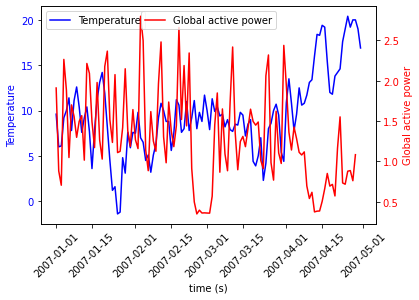

In [33]:
fig, ax1 = plt.subplots()
ax1.plot(small_temp_ts, '-', color='b', label='Temperature')
ax1.set_xlabel('time (s)')
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('Temperature', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')
plt.legend(loc='upper left')
plt.xticks(rotation=45)

ax2 = ax1.twinx()
ax2.plot(small_ts["Global_active_power"], '-',
         color='r', label='Global active power')
ax2.set_ylabel('Global active power', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
plt.legend(loc='upper center')
plt.show()